# **Step 1️⃣: Import Necessary Libraries**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # for creating dumy data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Step 2️⃣: Generate Sample Data (Dataset Creation)**

Generate Sample data

In [21]:
X,y= make_blobs(n_samples=300, centers=3, n_features=4, random_state=42)
print("dataset shape: ", X.shape)
# 300 rows, 4 coloumn

dataset shape:  (300, 4)


# **Step 3️⃣: Feature Scaling (Standardization)**

Data preprocessing

In [22]:
scaler= StandardScaler()  #It ensures that each feature (column) in X has:    Mean = 0  Standard Deviation = 1
X_scaled= scaler.fit_transform(X) #fit_transform(X) does two things:
# 1. Calculates the mean and standard deviation of each feature in X (using .fit()).
#2. transforms the data by subtracting the mean and dividing by the standard deviation (using .transform()).

In [23]:
import warnings
warnings.filterwarnings("ignore") #It prevents the display of unnecessary warning messages in the output.


# **Step 4️⃣: Determine the Optimal Number of Clusters (Elbow Method)**
What is WCSS?

WCSS measures how close data points are within the same cluster.
Lower WCSS means better clustering.

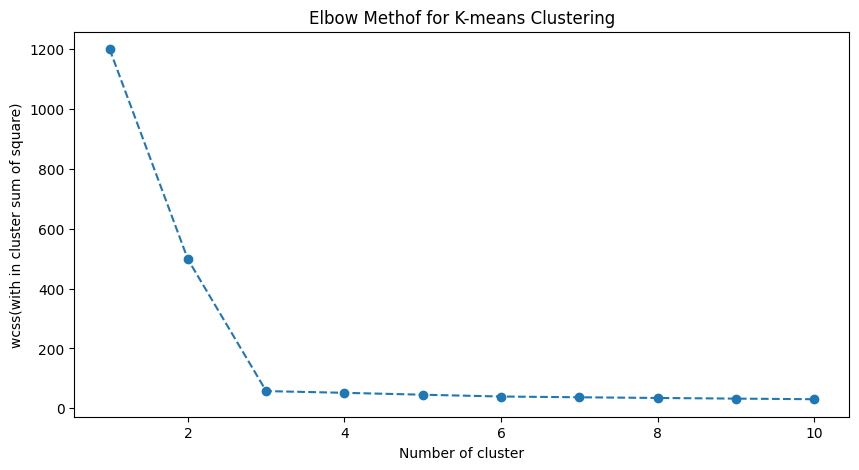

In [31]:
wcss=[]
for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_) #kmeans.inertia_: Computes the WCSS, which measures how compact the clusters are.
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker= 'o', linestyle='--')
plt.title('Elbow Methof for K-means Clustering')
plt.xlabel("Number of cluster")
plt.ylabel('wcss(with in cluster sum of square)')
plt.show()

# **Step 5️⃣: Apply K-Means Clustering**

In [33]:
# Perform k means cluster for k=3
kmeans= KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels= kmeans.fit_predict(X_scaled)

# **Step 6️⃣: Reduce Dimensionality using PCA**

In [36]:
#Apply PCA for dimension reduction
pca= PCA(n_components=2)
X_pca= pca.fit_transform(X_scaled)

# **Step 7️⃣: Visualize Clusters**




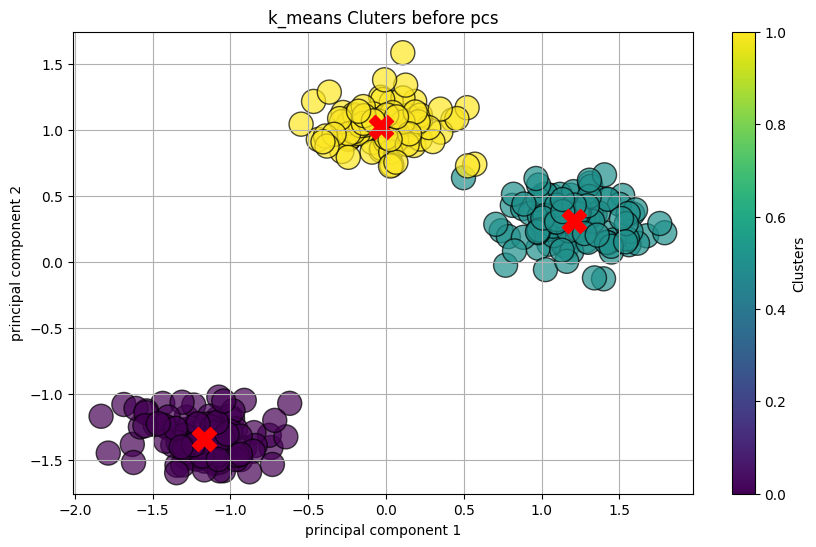

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[ :,0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=300, alpha=0.7)
#Plot centroid before pca
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker= 'X', label="Centroids")
plt.title('k_means Cluters before pcs')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar(label='Clusters')
plt.grid(True)
plt.show()

K-Mean cluster after PCA

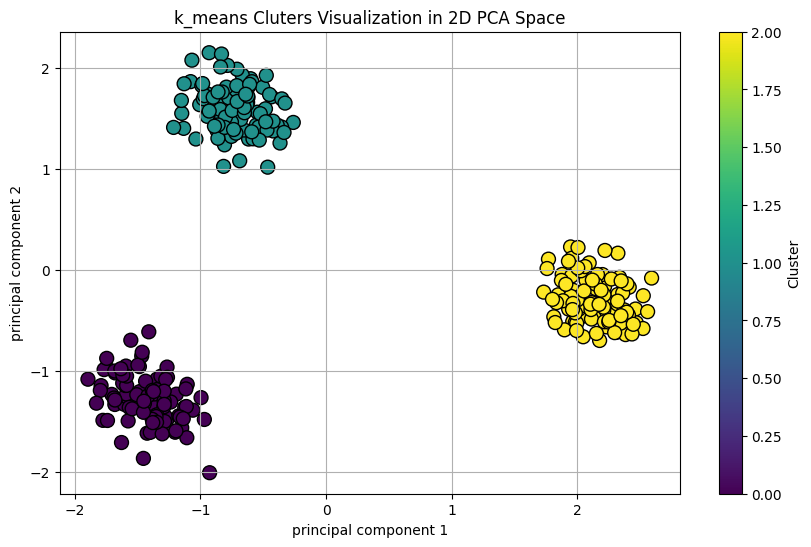

In [51]:
# visualize cluster
plt.figure(figsize=(10,6))
plt.scatter(X_pca[ :,0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=100)
plt.title('k_means Cluters Visualization in 2D PCA Space')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# **What is c=y?**

y is the true labels (original ground truth classes) of the data points.

This means each point is colored based on its actual class.

This is useful to compare the original data with clustering results.

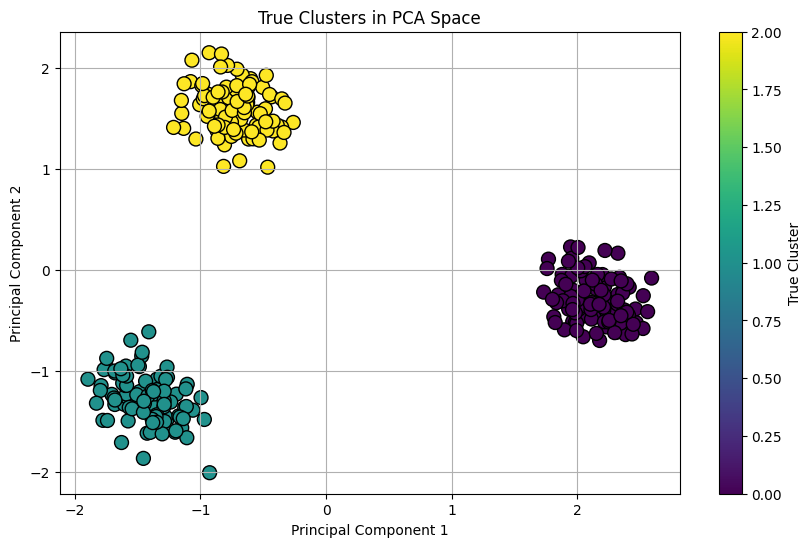

In [52]:
# (Optional) Compare with True Labels (for demonstration purposes only)
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('True Clusters in PCA Space')
plt.colorbar(label='True Cluster')
plt.grid(True)
plt.show()